# Cheers ML

- Drinking records of a person
- Author: Babu S, Rishu S
- Date: January 14, 2018


In [2]:
# import 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
read_data = pd.read_csv('./drink_data.csv', sep=',', encoding='latin-1')

read_data_df=read_data[['is_Sunday','is_Monday','is_Tuesday','is_Wednesday','is_thrusday','is_Friday','is_Saturday',
                        'People_Accompanied','Family_Presence','sober_status']]

read_data_df.head()

,is_Sunday,is_Monday,is_Tuesday,is_Wednesday,is_thrusday,is_Friday,is_Saturday,People_Accompanied,Family_Presence,sober_status
0,0,0,0,1,0,0,0,0,1,1
1,0,0,0,0,1,0,0,0,1,1
2,0,0,0,0,0,1,0,0,1,1
3,0,0,0,0,0,0,1,0,1,1
4,1,0,0,0,0,0,0,0,1,0


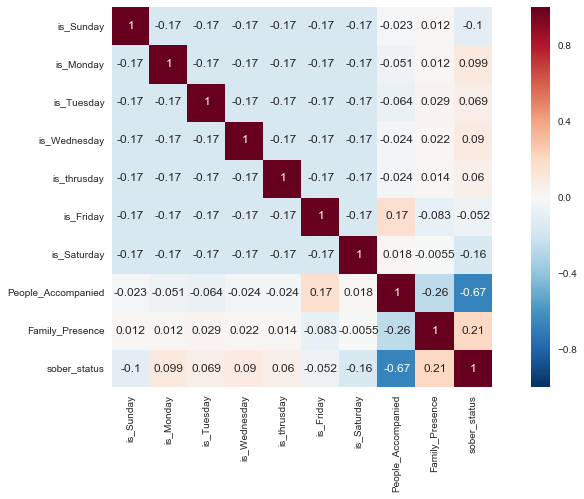

In [4]:
import seaborn as sns

ax = plt.subplots(figsize = (14,7))
sns.heatmap(read_data_df[['is_Sunday','is_Monday','is_Tuesday','is_Wednesday','is_thrusday','is_Friday','is_Saturday',
                        'People_Accompanied','Family_Presence','sober_status']].corr(),  
            linecolor = 'black', square=True, annot=True)
plt.show()

In [5]:
X = read_data_df[['is_Sunday','is_Monday','is_Tuesday','is_Wednesday','is_thrusday','is_Friday','is_Saturday'
                  ,'Family_Presence']]
y = read_data_df['sober_status']

In [6]:
# trains split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


In [7]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=7
knn_clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='distance')

In [8]:
knn_clf.score(X_test,y_test) * 100

84.615384615384613

In [9]:
sober=knn_clf.predict([[0,0,1,0,0,1,0,0]])

print(sober)

if sober == 0:
    print('You will Drink')
else:
    print('You will Not Drink')

[1]
You will Not Drink
